In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option("display.max_columns", 100)
%load_ext lab_black

In [3]:
path = "../data/churn.parquet"

In [4]:
df = pd.read_parquet(path)

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.SeniorCitizen = df.SeniorCitizen.astype("object")
df.loc[df.TotalCharges == " ", "TotalCharges"] = 0
df.TotalCharges = df.TotalCharges.astype("float64")

In [8]:
for col in df.columns.tolist():
    if df[col].dtype == "object":
        print(col.upper())
        print("*" * 20)
        print(df[col].value_counts())
        print("\n")
    else:
        print(col.upper())
        print("*" * 20)
        print(df[[col]].describe())
        print("\n")

CUSTOMERID
********************
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


GENDER
********************
Male      3555
Female    3488
Name: gender, dtype: int64


SENIORCITIZEN
********************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


PARTNER
********************
No     3641
Yes    3402
Name: Partner, dtype: int64


DEPENDENTS
********************
No     4933
Yes    2110
Name: Dependents, dtype: int64


TENURE
********************
            tenure
count  7043.000000
mean     32.371149
std      24.559481
min       0.000000
25%       9.000000
50%      29.000000
75%      55.000000
max      72.000000


PHONESERVICE
********************
Yes    6361
No      682
Name: PhoneService, dtype: int64


MULTIPLELINES
********************
No                  3390
Yes                 2971
No phone service

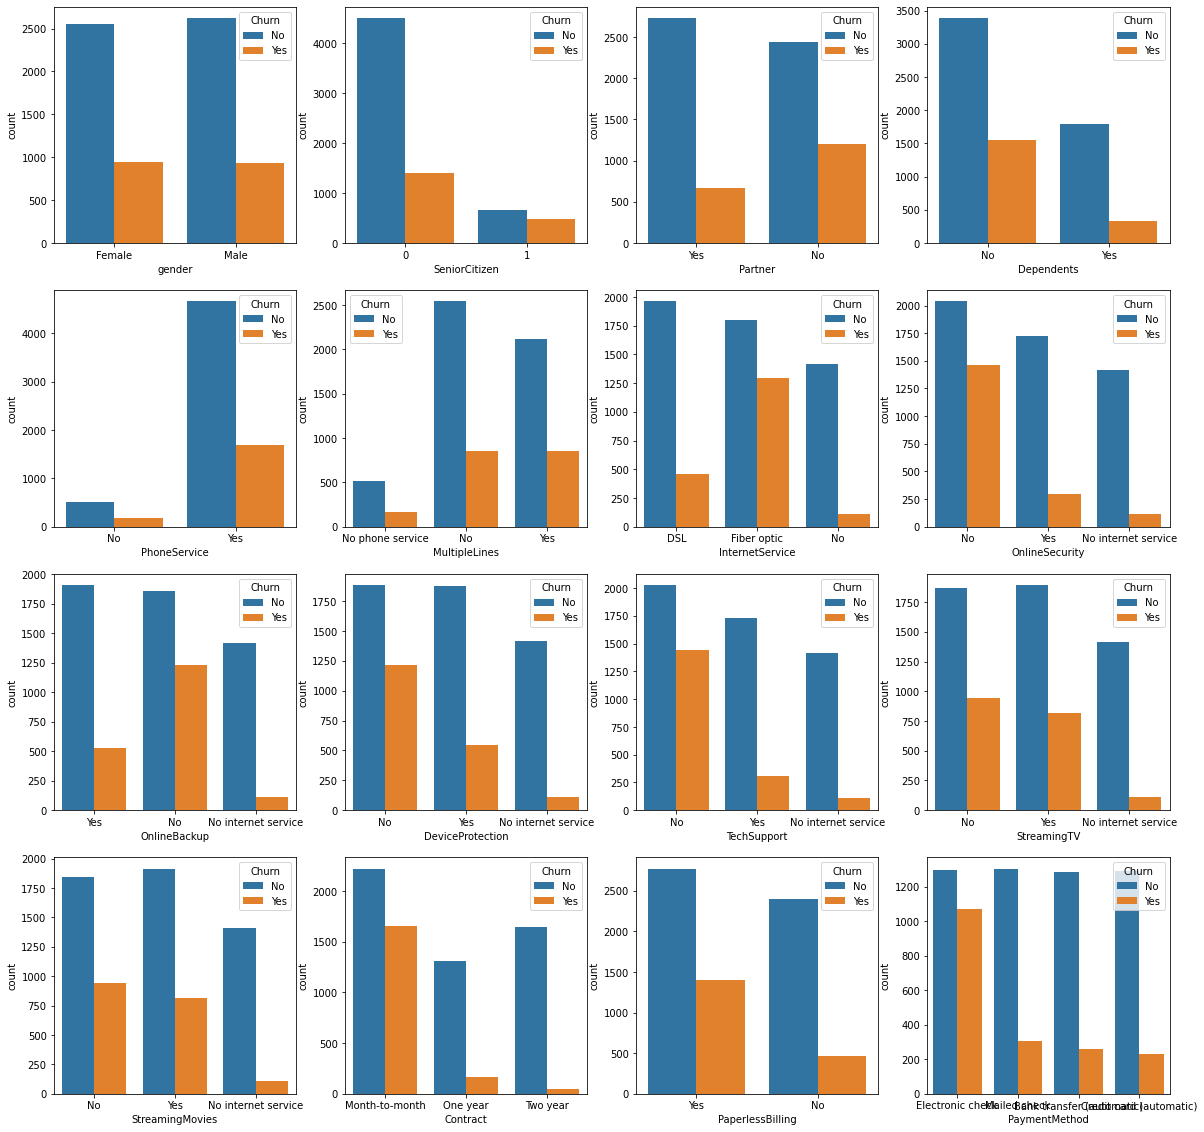

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

obj_cols = [
    col
    for col in df.columns
    if df[col].dtype == "object" and col not in ["customerID", "Churn"]
]

for col, ax in zip(obj_cols, axs.ravel()):
    sns.countplot(data=df, x=col, hue="Churn", ax=ax)

<AxesSubplot: xlabel='tenure', ylabel='Count'>

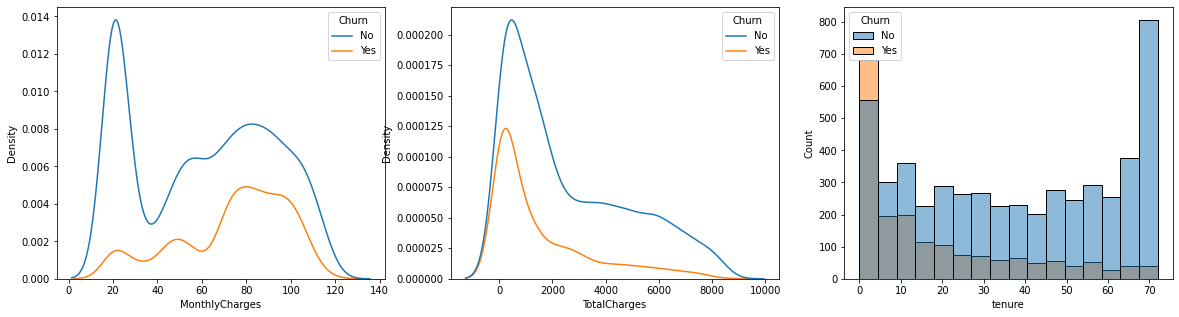

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", ax=axs[0])
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", ax=axs[1])
sns.histplot(data=df, x="tenure", hue="Churn", ax=axs[2])

## Preprocess

In [11]:
df.drop("customerID", axis=1, inplace=True)

In [12]:
le = LabelEncoder()

In [13]:
for col in df.columns.tolist():  # Except customerID
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])
    else:
        pass

In [14]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1
